Fernanda Martin del Campo Gómez **741359**
– Paulina Elizabeth Mejia Hori **739553**
– Jeanette Valenzuela Gutierrez **739825**

# Proyecto 2: Cálculo de Betas

### Objetivos
#### General:
Mediante el cálculo de betas de distintas acciones, encontrar la accion que nos genere un menor riesgo al invertir.

#### Específico:
Utilizar pandas para importar los datos de las acciones y el índice del mercado desde Yahoo Finance, para así realizar un análisis de los datos y llegar a un resultado.

## Problema:
Una persona quiere comenzar a invertir en la Bolsa de Valores Mexicana, por esta razón, desea empezar con la acción que presente un riesgo pequeño y más parecido al mercado posible. Tiene pensado invertir en una de las siguientes acciones:
- **Walmart**
- **Alsea**
- **Coca-Cola**
- **Banorte** 
- **Cemex**

Por lo tanto, hay que encontrar que acción significa un menor riesgo para él a la hora de invertir. 

## Modelo que representa el problema:

"**La Beta $\beta$** es una medida de sensibilidad que se utiliza para conocer la variación relativa de rentabilidad que sufre dicho activo en relación a un índice de referncia" (Economipedia, 2015).

Esto significa que toda acción tiene una beta que indica la variación y rentabilidad que tiene en base a un índice.

El valor de la beta representa la variación o riesgo de la acción:
- Si es menor a 1, varia poco con respecto al mercado.
- Si es igual a 1, varia igual que el mercado
- Si es mayor a 1, varia bastante con respecto al mercado.

**Por lo cual, hay que encontrar la acción con una Beta más parecida a 1, ya que será la acción con un riesgo y movimiento más parecido al mercado.**

El valor de Beta de una acción está dado por:

$$ \beta_{p} = \frac{Cov(r_{p}, r_{b})}{Var(r_{b})}$$
Donde: 
- Cov es la covarianza de los cambios porcentuales del Indice junto con los cambios porcentuales de la acción.
- Var es la varianza de los cambios porcentuales del Indice.


Al trabajar con la Bolsa de Valores Mexicana, **el índice a usar será el IPC** (Indice de precios al consumidor). 

## Solución del problema:

In [96]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pandas_datareader import data as web

In [97]:
# Recuperamos los datos del IPC de todo 1 año
ipc = web.DataReader('^MXX', start='2021-10-30', end='2022-10-30', data_source='yahoo')

In [98]:
# Solamente utilizaremos del precio de cierre de ajuste del IPC
ipc = ipc['Adj Close']

In [99]:
#Función para descargar los precios de cierre ajustados de cualquier acción en cualquier fecha
def get_closes(tickers, start_date=None, end_date=None):
    closes = web.DataReader(tickers, start=start_date, end=end_date, data_source='yahoo')['Adj Close']
    closes = closes.sort_index()
    return closes

In [102]:
# Acciones y fechas a recuperar
names = ['GFNORTEO.MX','WALMEX.MX', 'ALSEA.MX', 'KOFUBL.MX','CEMEXCPO.MX']
start = '2021-10-30'
end = '2022-10-30'

In [108]:
# Recuperamos los datos de las 5 acciones de todo 1 año 
acciones = get_closes(tickers=names, start_date=start, end_date = end)
acciones

Symbols,GFNORTEO.MX,WALMEX.MX,ALSEA.MX,KOFUBL.MX,CEMEXCPO.MX
Date,,,,,
2021-11-01,118.856430,72.617142,44.270000,97.102516,13.18
2021-11-03,124.378090,74.330322,43.990002,96.629608,13.05
2021-11-04,123.404785,75.132454,43.889999,96.853165,12.71
2021-11-05,124.892830,75.548370,43.680000,95.606392,12.94
2021-11-08,123.966324,75.122551,43.959999,94.067261,14.26
...,...,...,...,...,...
2022-10-24,161.300003,74.809998,36.650002,120.769997,7.07
2022-10-25,164.910004,75.480003,37.270000,122.790001,7.25
2022-10-26,160.479996,76.739998,37.830002,124.529999,7.43


<AxesSubplot:xlabel='Date'>

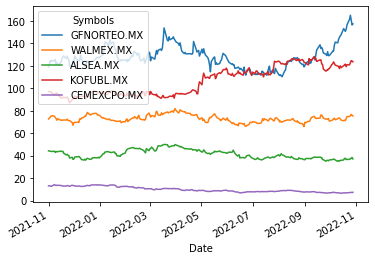

In [109]:
# Observamos la variación de precios de las 5 acciones
acciones.plot()

Recordando el cálculo de covarianza, esta es igual a:

$$\frac{\sum(x_i-x_{avg})(y_i-y_{avg})}{n-1}$$
Donde:
- x, y son dos conjunto de datos (En este caso el Indice y la acción).
- $x_{avg}$ y $y_{avg}$ son los promedios de esos conjuntos de datos.
- n es el número de datos de dichos conjuntos.

In [113]:
for i in acciones: # Para cada acción:
    
    # Calculamos la covarianza del cambio p. de la acción e indice:
    
    # Obtenemos el cambio porcentual de la acción (actual - anterior / anterior)
    cp = (acciones[i] - acciones[i].shift()) / acciones[i].shift()
    # Calculamos el cambio porcentual del índice
    cp_ipc = (ipc - ipc.shift()) / ipc.shift()
    # Recuperamos los valores promedio de estos conjuntos
    promedio = cp.mean() # mean es una función que te el promedio
    promedio_ipc = cp_ipc.mean()
    # Restamos el promedio a cada valor del conjunto
    resta = cp - promedio
    resta_ipc = cp_ipc - promedio_ipc
    # Multiplicamos las dos restas
    multiplicacion = resta * resta_ipc
    # Hacemos una sumatoria de estos valores (la función sum lo hace directamente)
    sumatoria = multiplicacion.sum()
    # Por último dividimos la sumatoria entre n - 1
    covarianza = sumatoria / (cp.count() - 1)
    
    
    # Posteriormente, calculamos la varianza del cambio p. del índice:
    
    # La función std nos da la desviación estándar
    desviacion = cp_ipc.std()
    # La varianza es igual al cuadrado de la desviación
    varianza = desviacion ** 2
    
    
    # Por último, dividimos la covarianza entre la varianza:
    
    beta = covarianza / varianza
    beta = round(beta, 2) # Redondeamos beta a 2 decimales
    
    # Imprimimos la beta de la acción
    print(i, "=", beta)
    

GFNORTEO.MX = 1.35
WALMEX.MX = 0.9
ALSEA.MX = 0.73
KOFUBL.MX = 0.52
CEMEXCPO.MX = 1.57


**Como podemos observar, la beta más cercana a 1 es de Walmart, por lo tanto la recomendación al nuevo inversionista es comprar acciones de esta empresa**

## Visualización de la solución:

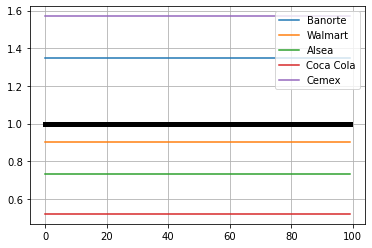

In [141]:
x = range(100)
plt.figure()
plt.grid()
plt.plot(x, 1*np.ones(len(x)), linewidth=5, c="black")
plt.plot(x, 1.35*np.ones(len(x)), label="Banorte")
plt.plot(x, 0.9*np.ones(len(x)), label="Walmart")
plt.plot(x, 0.73*np.ones(len(x)), label="Alsea")
plt.plot(x, 0.52*np.ones(len(x)), label="Coca Cola")
plt.plot(x, 1.57*np.ones(len(x)), label="Cemex")
plt.legend()

## Conclusiones:

En conclusión, se logró implementar el uso de herramientas tecnológicas para la resolución de problemas financieros; en este caso, se utilizó la librería “pandas” para calcular la beta de diferentes acciones y de esta manera, tomar una decisión a la hora de invertir. Cabe aclarar que la beta es solo un parámetro de los varios que pueden ser tomados en cuenta al momento que compramos acciones, sin embargo, es un muy buen ejemplo de como podemos usar la simulación matemática en las finanzas y  bolsa de valores.

## Referencias:

- Alfonso Peiro Ucha, 26 de noviembre, 2015
Beta de un activo financiero. Economipedia.com